In [11]:
%doctest_mode
%pylab inline

Exception reporting mode: Context
Doctest mode is: OFF
Populating the interactive namespace from numpy and matplotlib


In [2]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()

In [3]:
>>> iris.data.shape
(150, 4)

(150, 4)

In [4]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [8]:
>>> iris.target.shape

(150,)

In [7]:
>>> import numpy as np
>>> np.unique(iris.target)

array([0, 1, 2])

In [9]:
>>> digits = datasets.load_digits()
>>> digits.images.shape

(1797, 8, 8)

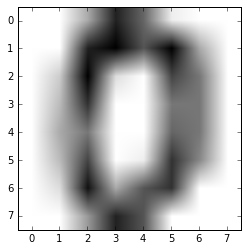

In [12]:
>>> import pylab as pl
>>> pl.imshow(digits.images[0], cmap=pl.cm.gray_r) 

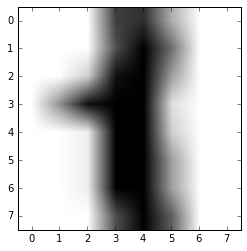

In [13]:
pl.imshow(digits.images[1], cmap=pl.cm.gray_r) 

In [17]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [19]:
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [20]:
>>> from sklearn import svm
>>> clf = svm.LinearSVC()
>>> clf.fit(iris.data, iris.target) # learn from the data 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [21]:
clf.predict([[ 5.0,  3.6,  1.3,  0.25]])

array([0])

In [22]:
clf.coef_

array([[ 0.18424059,  0.45122549, -0.80794177, -0.45071907],
       [ 0.05283228, -0.88996004,  0.40092899, -0.93320193],
       [-0.85074124, -0.98657288,  1.38103308,  1.86542552]])

### KNN (k-nearest neighbors) classification example:

In [23]:
>>> # Create and fit a nearest-neighbor classifier
>>> from sklearn import neighbors
>>> knn = neighbors.KNeighborsClassifier()
>>> knn.fit(iris.data, iris.target) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
>>> knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

In [25]:
>>> perm = np.random.permutation(iris.target.size)
>>> iris.data = iris.data[perm]
>>> iris.target = iris.target[perm]
>>> knn.fit(iris.data[:100], iris.target[:100]) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
>>> knn.score(iris.data[100:], iris.target[100:]) 

0.93999999999999995

### Support vector machines (SVMs) for classification

In [29]:
>>> from sklearn import svm
>>> svc = svm.SVC(kernel='linear')
>>> svc.fit(iris.data, iris.target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
type(data)

numpy.ndarray

In [36]:
shape(data)

(1797, 64)

In [37]:
0.9*1797

1617.3

In [38]:
data[:1600]

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,  14.,  16.,   7.],
       [  0.,   0.,   0., ...,  13.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [41]:
len(data[1601:])

196

### K-means clustering

In [43]:
>>> from sklearn import cluster, datasets
>>> iris = datasets.load_iris()
>>> k_means = cluster.KMeans(n_clusters=3)
>>> k_means.fit(iris.data) 

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [44]:
>>> print(k_means.labels_[::10])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]


In [45]:
>>> print(iris.target[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


### Principal Component Analysis

In [51]:
iris.data.shape

(150, 4)

In [52]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [46]:
>>> from sklearn import decomposition
>>> pca = decomposition.PCA(n_components=2)
>>> pca.fit(iris.data)

PCA(copy=True, n_components=2, whiten=False)

In [47]:
>>> X = pca.transform(iris.data)

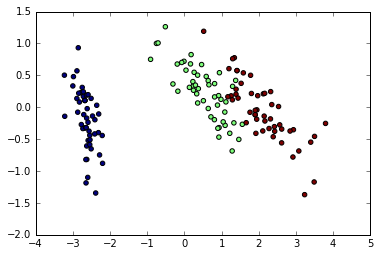

In [48]:
>>> import pylab as pl
>>> pl.scatter(X[:, 0], X[:, 1], c=iris.target) 